# Using both image and text features as a concatenated representation

In [54]:
# Imports
import os
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline  

plt.style.use('fivethirtyeight')

In [55]:
# Loading the data
from sklearn.externals import joblib
image_feats = joblib.load('image_feats.pkl')
text_feats = joblib.load('text_feats.pkl')

In [56]:
image_feats.shape

(1000, 256)

In [57]:
text_feats.shape

(1000, 300)

In [58]:
data = np.hstack((image_feats, text_feats))

In [59]:
data.shape

(1000, 556)

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import cycle, islice

num_clusters = 11
num_seeds = 11
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}


# create k-means model with custom config
clustering_model = KMeans(n_clusters=num_clusters,max_iter=max_iterations,precompute_distances="auto", n_jobs=-1)

labels = clustering_model.fit_predict(data)
# print labels
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))


In [61]:
reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data3 = PCA(n_components=3).fit_transform(data)

In [62]:
def save_fig(directory, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Method to save plots to the directory
    :param directory:
    :param fig_id:
    :param tight_layout:
    :param fig_extension:
    :param resolution:
    :return:
    """
    path = os.path.join(directory, fig_id + "." + fig_extension)
    print("Saving figure : " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [65]:
def walk_up_folder(path, depth=1):
    """
    Helper method to navigate the file system and get to the file location
    """
    _cur_depth = 1        
    while _cur_depth < depth:
        path = os.path.dirname(path)
        _cur_depth += 1
    return path

img_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'static/plots')
if not os.path.exists(img_path):
    os.makedirs(img_path)

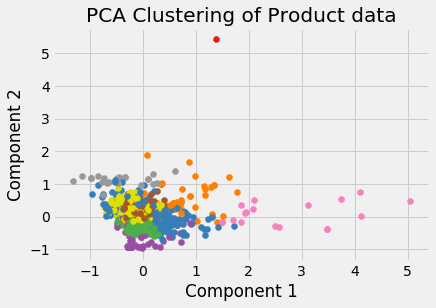

Saving figure : PCA2dcomb


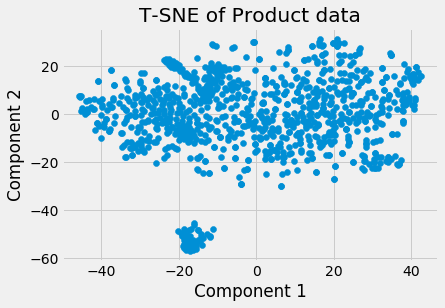

Saving figure : t-SNE2dcomb


In [66]:
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = colors[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("PCA Clustering of Product data")
plt.show()
save_fig(img_path,"PCA2dcomb",False)


# t-SNE plot
embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(data)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("T-SNE of Product data")
plt.show()
save_fig(img_path,"t-SNE2dcomb",False)


Saving figure : PCA3dcombine


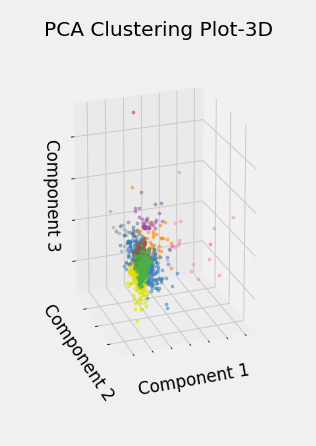

In [67]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=17, azim=250)
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2,pca_comp3 = reduced_data3[index]
    color = colors[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2,pca_comp3, c=color,alpha=0.5, s=10)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA Clustering Plot-3D')
ax.dist = 12
save_fig(img_path,"PCA3dcombine",False)

Saving figure : T-SNE3dcombine


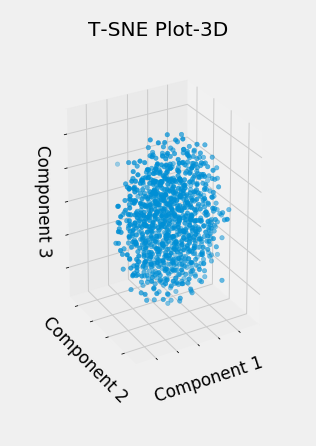

In [68]:
# t-SNE plot
embeddings = TSNE(n_components=3)
Y = embeddings.fit_transform(data)
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=20, azim=60)
ax.scatter(Y[:, 0], Y[:, 1],Y[:, 2], cmap=plt.cm.Spectral)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('T-SNE Plot-3D')
ax.dist = 12
save_fig(img_path,"T-SNE3dcombine",False)

In [69]:
label_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/label_final.txt')
labels

array([ 4,  1,  0,  1,  0,  4,  0,  8,  1,  1,  0,  4,  4,  3,  2,  1,  4,
        2,  4,  2,  2,  9,  2,  0,  4,  2,  0,  8,  0,  2,  0,  4,  7,  2,
        3,  0,  2,  0,  0,  4,  4,  4,  8,  1,  0,  4,  4,  2,  2,  4,  4,
        2,  8,  9,  8,  2,  2,  2,  2,  4,  4,  2,  2,  1,  9,  2,  1,  1,
        8,  8,  8,  2,  2,  0,  8,  2,  8,  8,  4,  4,  9,  0,  4,  2,  9,
        4,  2,  2,  8,  0,  8,  4,  4,  4,  4,  9,  4,  4,  1,  4,  2,  3,
        0,  9,  4,  4,  1,  0,  2,  4,  4,  2,  4,  4,  2,  2,  5,  0,  2,
        9,  0,  3,  4,  8,  2,  8,  8,  2,  8,  9,  8,  9,  2,  9,  2,  9,
        9,  9,  2,  2,  8,  9,  9,  2,  2,  9,  2,  6,  0,  0,  8,  1,  0,
        9,  1,  0,  4,  4,  4,  4,  9,  2,  8,  2,  3,  2,  4,  9,  4,  2,
        2,  2,  0,  4,  4,  4,  4,  0,  2,  4,  2,  1,  6,  4,  2,  0,  2,
        8,  4,  2,  2,  2,  4,  2,  2,  2,  9,  8,  4,  8,  5,  2,  8,  8,
        2,  8,  9,  9,  8,  8,  8,  4,  4,  0,  4,  0,  2,  2,  4,  0,  4,
        8,  4,  4,  0,  4

In [70]:
# Storing the labels into a separate file
with open(label_path, "w", encoding='utf-8') as target:
    for _ in range(len(labels)):
        target.write(str(labels[_]))
        target.write("\n")

# Appending labels to the input 

In [71]:
result_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'result.json')

In [72]:
import json
label_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/label_final.txt')
categories_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_categories.txt')
data_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_data.json')

with open(data_path, encoding='utf-8') as data_file:
    product = json.loads(data_file.read())

with open(categories_path, encoding='utf-8') as data_file:
    categories = data_file.read().split("\n")

label_mapping = {idx:val for idx,val in enumerate(categories)}
label_mapping

{0: 'Dresses',
 1: 'Tops',
 2: 'Jeans',
 3: 'Skirts',
 4: 'Rompers',
 5: 'Shoes',
 6: 'Bags',
 7: 'Jewelry',
 8: 'Swimwear',
 9: 'Intimates',
 10: 'Others'}

In [73]:
possible={}
possible[0]="Others"

# Trying out cosine similarity

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
data.shape

(1000, 556)

In [76]:
type(data)

numpy.ndarray

In [77]:
data[0].shape

(556,)

In [78]:
data[0]

array([  2.33765662e-01,   4.27752161e+00,   0.00000000e+00,
         0.00000000e+00,   2.20692062e+00,   2.40945148e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.36424017e+00,   6.22734737e+00,   0.00000000e+00,
         5.39186478e-01,   0.00000000e+00,   3.25403142e+00,
         0.00000000e+00,   2.59058094e+00,   4.77349949e+00,
         5.39917278e+00,   1.99489856e+00,   0.00000000e+00,
         0.00000000e+00,   1.05533433e+00,   3.95956659e+00,
         0.00000000e+00,   0.00000000e+00,   3.07229924e+00,
         1.67774487e+00,   6.05243111e+00,   2.33649564e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.18117094e+00,   2.32322145e+00,   0.00000000e+00,
         0.00000000e+00,   2.47810960e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.59379482e+00,   0.00000000e+00,
         0.00000000e+00,   1.83605158e+00,   0.00000000e+00,
         0.00000000e+00,

In [79]:
len(data[0].reshape(-1, 1).tolist())

556

In [80]:
#cosine_matrix = np.ndarray(shape=(1000,1000),dtype=np.float32)

In [81]:
cosine_similarity(data[0].reshape(1, -1),data[19].reshape(1, -1), dense_output=True)[0][0]

0.99869626172073644

In [82]:
#Takes too long
# for i in range(1000):
#     for j in range(1000):
#         cosine_matrix[i][j]= cosine_similarity(data[i].reshape(1, -1),data[j].reshape(1, -1), dense_output=True)[0][0]

In [83]:
import scipy.sparse
datasp = scipy.sparse.csc_matrix(data)

In [84]:
datasp

<1000x556 sparse matrix of type '<class 'numpy.float64'>'
	with 416665 stored elements in Compressed Sparse Column format>

In [85]:
import sklearn.preprocessing as pp

def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)
    return col_normed_mat.T * col_normed_mat

def jaccard_similarities(mat):
    cols_sum = mat.getnnz(axis=0)
    ab = mat.T * mat

    # for rows
    aa = np.repeat(cols_sum, ab.getnnz(axis=0))
    # for columns
    bb = cols_sum[ab.indices]

    similarities = ab.copy()
    similarities.data /= (aa + bb - ab.data)

    return similarities

In [86]:
cosine_matrix = cosine_similarities(datasp)

In [87]:
jaccard_matrix = jaccard_similarities(datasp)

In [88]:
jaccard_matrix

<556x556 sparse matrix of type '<class 'numpy.float64'>'
	with 196590 stored elements in Compressed Sparse Row format>

In [89]:
cosine_matrix

<556x556 sparse matrix of type '<class 'numpy.float64'>'
	with 196590 stored elements in Compressed Sparse Row format>

In [90]:
df = pd.DataFrame(data)

In [91]:
cosine_matrix=cosine_similarity(df)

In [92]:
cosine_matrix.shape

(1000, 1000)

In [93]:
cosine_matrix

array([[ 1.        ,  0.99728759,  0.99918341, ...,  0.99889265,
         0.99880746,  0.99876334],
       [ 0.99728759,  1.        ,  0.99724835, ...,  0.99776157,
         0.99751594,  0.99744477],
       [ 0.99918341,  0.99724835,  1.        , ...,  0.99900675,
         0.9988889 ,  0.99884613],
       ..., 
       [ 0.99889265,  0.99776157,  0.99900675, ...,  1.        ,
         0.99984293,  0.99978584],
       [ 0.99880746,  0.99751594,  0.9988889 , ...,  0.99984293,
         1.        ,  0.99999523],
       [ 0.99876334,  0.99744477,  0.99884613, ...,  0.99978584,
         0.99999523,  1.        ]])